Importing Pandas Library.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.models import save_model

Loading the **Glassdoor** dataset

In [59]:
data = pd.read_csv("/content/sample_data/Uncleaned_DS_jobs.csv")

Changing the index

In [60]:
data_1 = data.rename_axis('Job_no')
del data_1['index']
data_1.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
Job_no,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Performing the necessary transformations:


In [61]:
data_1['Salary Estimate'] = data_1['Salary Estimate'].str.replace('$', '', regex=False).str.replace('K', '000', regex=False).str.replace('(Glassdoor est.)', '', regex=False).str.replace('(Employer est.)', '', regex=False)
data_1[['Base Salary', 'Top Salary']] = data_1['Salary Estimate'].str.split('-', expand=True).astype(int)
data_1.drop('Salary Estimate', axis=1, inplace=True)
data_1['Company Name'] = data_1['Company Name'].str.split('\n').str[0]
data_1['State'] = data_1['Location'].str.split(',').str[1]
data_1['Location'] = data_1['Location'].str.split(',').str[0]
data_1['Sector'] = data_1['Sector'].replace('-1', 'Unknown')
data_1['Competitors'] = data_1['Competitors'].replace('-1', 'Unknown')

In [50]:
data_1.head(5)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Base Salary,Top Salary,State
Job_no,,,,,,,,,,,,,,,,
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,New York,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,NY
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,Chantilly,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Unknown,137000,171000,VA
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,Boston,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Unknown,137000,171000,MA
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,Newton,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,MA
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,New York,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,NY


Now, lets check some visualizations by creating a bar plot to check which firm provides the highest base salary and also the highest top salary according to the Glassdoor job market.

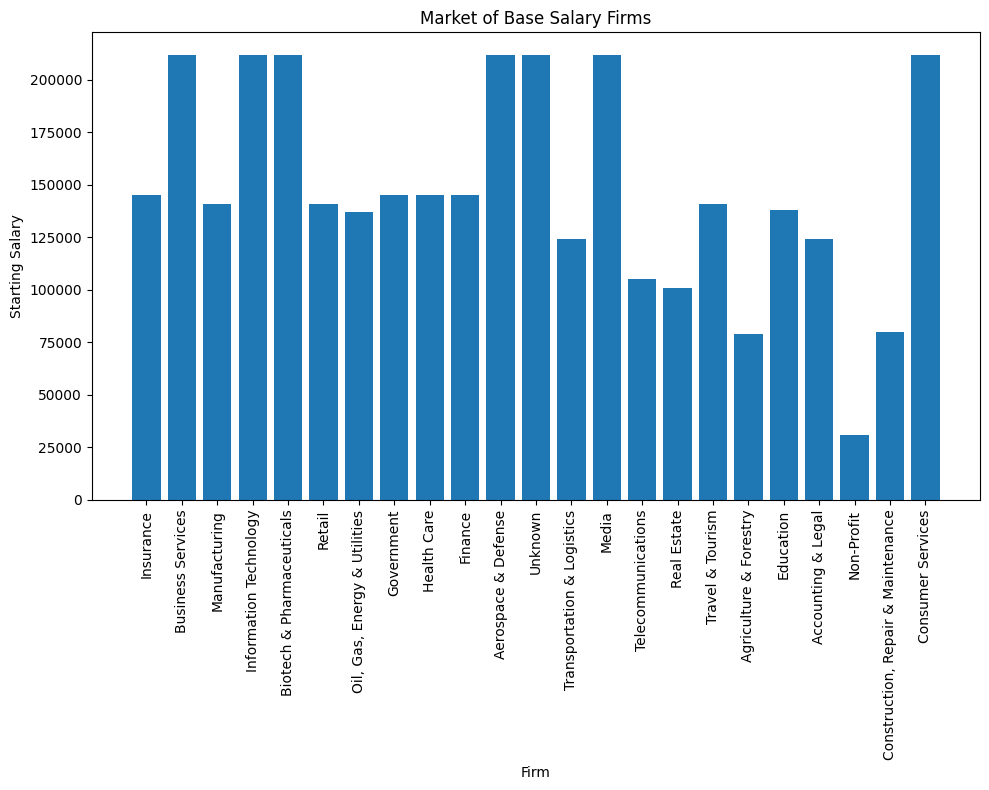

In [62]:
plt.figure(figsize=(10, 8))
bars = plt.bar(data_1['Sector'], data_1['Base Salary'])
plt.xlabel('Firm')
plt.ylabel('Starting Salary')
plt.title('Market of Base Salary Firms')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

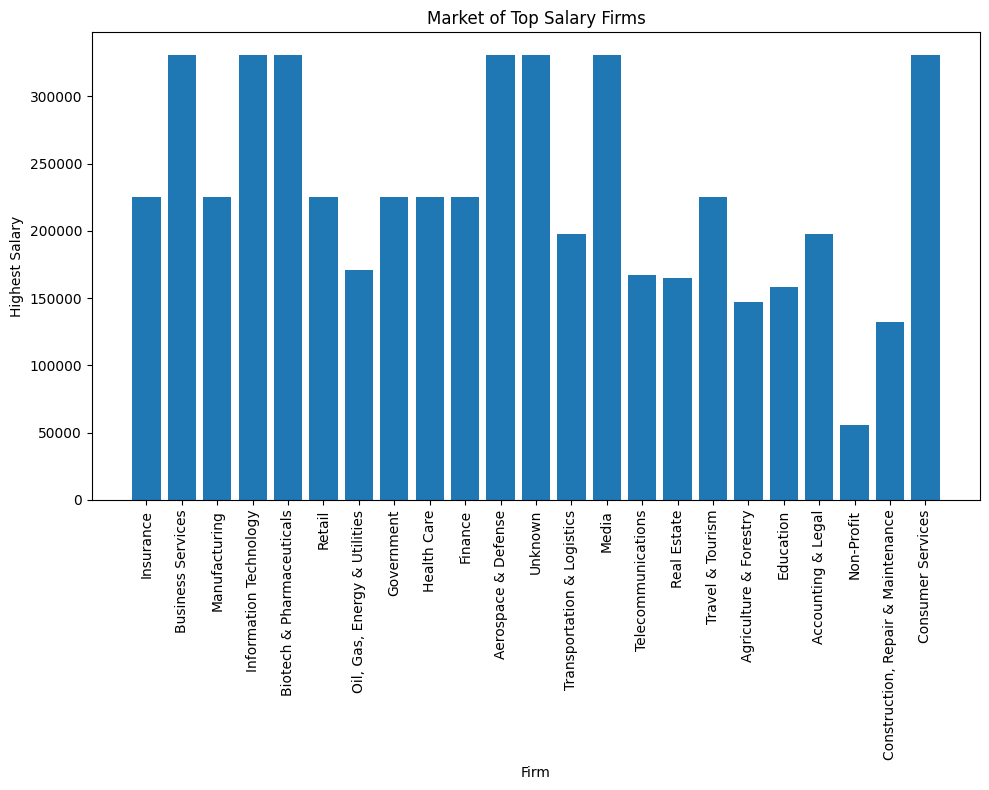

In [63]:
plt.figure(figsize=(10, 8))
bars = plt.bar(data_1['Sector'], data_1['Top Salary'])
plt.xlabel('Firm')
plt.ylabel('Highest Salary')
plt.title('Market of Top Salary Firms')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Now,I want to create a Linear Regression model to check rating of a particular job.

In [64]:
x = data_1['Job Title']
y = data_1['Rating']

x1, x2, y1, y2 = train_test_split(x, y, test_size=0.5, random_state=42)

vector = CountVectorizer()
x_train_vector = vector.fit_transform(x1)
x_test_vector = vector.transform(x2)

model = LinearRegression()
model.fit(x_train_vector, y1)

y_prediction = model.predict(x_test_vector)



sample_job = ['Data Analyst', 'Data Scientist', 'Data Engineer']
x3 = vector.transform(sample_job)
y3 = model.predict(x3)

print(f'The Job {sample_job} has a rating of {y3}')


The Job ['Data Analyst', 'Data Scientist', 'Data Engineer'] has a rating of [3.91541797 3.14622934 4.04352681]


This is to check if the prediction from linear regression meets with the actual values by checking with a scatter plot.

The Linear regression values are almost near and accurate to the actual values.

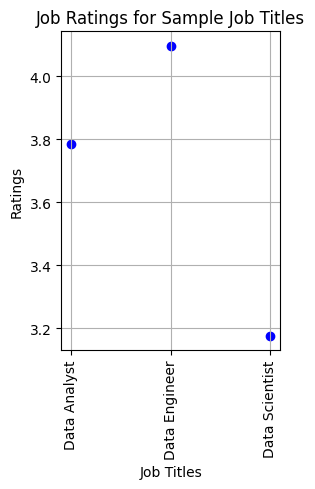

In [29]:
ratings = data_1.groupby('Job Title')['Rating'].mean()
titles = ratings[ratings.index.isin(sample_job)]
plt.figure(figsize=(3, 5))
plt.scatter(titles.index, titles.values, color='b', label='Whole Ratings', marker='o')
plt.title('Job Ratings for Sample Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Now, let us check with the LSTM model to see if we can get better results.

In [83]:
x_train_dense = x_train_vector.toarray()
x_test_dense = x_test_vector.toarray()
deep_model = Sequential()
deep_model.add(Embedding(input_dim=500, output_dim=1000, input_length=159))
deep_model.add(LSTM(units=128))
deep_model.add(Dense(units=1, activation='linear'))
deep_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
deep_model.fit(x_train_dense, y1, epochs=15, batch_size=64, validation_data=(x_test_dense, y2))
loss, mean_absolute_error = deep_model.evaluate(x_test_dense, y2)
deep_model.save('deep_model.h5')

Epoch 1/15
6/6 [==============================] - 17s 2s/step - loss: 7.6965 - mean_absolute_error: 2.5047 - val_loss: 2.4696 - val_mean_absolute_error: 0.9503
Epoch 2/15
6/6 [==============================] - 8s 1s/step - loss: 2.4806 - mean_absolute_error: 0.9240 - val_loss: 2.0463 - val_mean_absolute_error: 1.0165
Epoch 3/15
6/6 [==============================] - 11s 2s/step - loss: 2.2651 - mean_absolute_error: 1.1259 - val_loss: 2.1423 - val_mean_absolute_error: 1.0941
Epoch 4/15
6/6 [==============================] - 10s 2s/step - loss: 2.1113 - mean_absolute_error: 0.9595 - val_loss: 1.9035 - val_mean_absolute_error: 0.8222
Epoch 5/15
6/6 [==============================] - 9s 2s/step - loss: 2.1333 - mean_absolute_error: 0.8361 - val_loss: 1.9032 - val_mean_absolute_error: 0.8204
Epoch 6/15
6/6 [==============================] - 9s 2s/step - loss: 2.1145 - mean_absolute_error: 0.8988 - val_loss: 2.0080 - val_mean_absolute_error: 0.9836
Epoch 7/15
6/6 [===========================

From the below test case, I observed that LSTM model is not efficient for this data.

In [84]:
MODEL = load_model('deep_model.h5')
x4 = x3.toarray()
PREDICTION = MODEL.predict(x4)
print(f'The Job {sample_job} has a rating of {PREDICTION}')

1/1 [==============================] - 1s 539ms/step
The Job ['Data Analyst', 'Data Scientist', 'Data Engineer'] has a rating of [[3.3761866]
 [3.3761883]
 [3.3761866]]
